In [ ]:
!git clone https://github.com/NeerajSarwan/CPT.git

Cloning into 'CPT'...
remote: Enumerating objects: 66, done.
remote: Total 66 (delta 0), reused 0 (delta 0), pack-reused 66
Unpacking objects: 100% (66/66), done.


In [ ]:
import CPT

In [ ]:
!pip install cpt

     |████████████████████████████████| 727kB 5.9MB/s 


In [ ]:
from cpt.cpt import Cpt
model = Cpt()

In [1]:
import pandas as pd
import numpy as np

In [2]:
PATH = "drive/My Drive/JH_RecommendationSystemz/"
train_df = pd.read_csv(f'{PATH}train.csv')
challenge = pd.read_csv(f'{PATH}challenge_data.csv')
test_df = pd.read_csv(f'{PATH}test.csv')
submission = pd.read_csv(f'{PATH}sample_submission_J0OjXLi_DDt3uQN.csv')

In [3]:
submission

,user_sequence,challenge
0,4577_11,CI23648
1,4577_12,CI23648
2,4577_13,CI23648
3,4578_11,CI23648
4,4578_12,CI23648
...,...,...
119191,113834_12,CI23648
119192,113834_13,CI23648
119193,113838_11,CI23648
119194,113838_12,CI23648


In [4]:
submission['userID'] = submission['user_sequence'].apply(lambda x: x.split("_")[0])

In [5]:
submission['userID'].nunique()

39732

In [6]:
train_df.head()

,user_sequence,user_id,challenge_sequence,challenge
0,4576_1,4576,1,CI23714
1,4576_2,4576,2,CI23855
2,4576_3,4576,3,CI24917
3,4576_4,4576,4,CI23663
4,4576_5,4576,5,CI23933


In [7]:
challenge.shape

(5606, 9)

In [8]:
challenge.head()

,challenge_ID,programming_language,challenge_series_ID,total_submissions,publish_date,author_ID,author_gender,author_org_ID,category_id
0,CI23478,2,SI2445,37.0,06-05-2006,AI563576,M,AOI100001,NaN
1,CI23479,2,SI2435,48.0,17-10-2002,AI563577,M,AOI100002,32.0
2,CI23480,1,SI2435,15.0,16-10-2002,AI563578,M,AOI100003,NaN
3,CI23481,1,SI2710,236.0,19-09-2003,AI563579,M,AOI100004,70.0
4,CI23482,2,SI2440,137.0,21-03-2002,AI563580,M,AOI100005,NaN


## Baseline using KNN

### NA values

In [9]:
train_df.isnull().sum()

user_sequence         0
user_id               0
challenge_sequence    0
challenge             0
dtype: int64

In [10]:
challenge.isnull().sum()

challenge_ID               0
programming_language       0
challenge_series_ID       12
total_submissions        352
publish_date               0
author_ID                 39
author_gender             97
author_org_ID            248
category_id             1841
dtype: int64

In [11]:
train_df.head()

,user_sequence,user_id,challenge_sequence,challenge
0,4576_1,4576,1,CI23714
1,4576_2,4576,2,CI23855
2,4576_3,4576,3,CI24917
3,4576_4,4576,4,CI23663
4,4576_5,4576,5,CI23933


### let us consider only userID, challenge_id and challenge sequence in the beginning

In [12]:
test_df.head()

,user_sequence,user_id,challenge_sequence,challenge
0,4577_1,4577,1,CI23855
1,4577_2,4577,2,CI23933
2,4577_3,4577,3,CI24917
3,4577_4,4577,4,CI24915
4,4577_5,4577,5,CI23714


In [13]:
train_test = pd.concat([train_df,test_df],axis=0)
train_test.reset_index(inplace=True)
train_test.drop(columns='index',axis=1,inplace=True)

In [14]:
df = pd.merge(train_test,challenge,left_on="challenge",right_on="challenge_ID",how="left")

In [15]:
df.head()

,user_sequence,user_id,challenge_sequence,challenge,challenge_ID,programming_language,challenge_series_ID,total_submissions,publish_date,author_ID,author_gender,author_org_ID,category_id
0,4576_1,4576,1,CI23714,CI23714,1,SI2477,14723.0,12-06-2006,AI563766,M,AOI100129,29.0
1,4576_2,4576,2,CI23855,CI23855,1,SI2468,20993.0,24-07-2006,AI563823,M,NaN,29.0
2,4576_3,4576,3,CI24917,CI24917,1,SI2545,43409.0,02-07-2007,AI564588,F,AOI100581,66.0
3,4576_4,4576,4,CI23663,CI23663,1,SI2472,8897.0,15-09-2004,AI563724,M,AOI100098,45.0
4,4576_5,4576,5,CI23933,CI23933,1,SI2468,15086.0,27-07-2006,AI563783,M,AOI100149,31.0


In [16]:
df.fillna(method="ffill",inplace=True)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
sc = MinMaxScaler(feature_range=(1,2))

In [19]:
df[['challenge_sequence','total_submissions']] = sc.fit_transform(df[['challenge_sequence','total_submissions']])

In [20]:
df.head()

,user_sequence,user_id,challenge_sequence,challenge,challenge_ID,programming_language,challenge_series_ID,total_submissions,publish_date,author_ID,author_gender,author_org_ID,category_id
0,4576_1,4576,1.000000,CI23714,CI23714,1,SI2477,1.339139,12-06-2006,AI563766,M,AOI100129,29.0
1,4576_2,4576,1.083333,CI23855,CI23855,1,SI2468,1.483586,24-07-2006,AI563823,M,AOI100129,29.0
2,4576_3,4576,1.166667,CI24917,CI24917,1,SI2545,2.000000,02-07-2007,AI564588,F,AOI100581,66.0
3,4576_4,4576,1.250000,CI23663,CI23663,1,SI2472,1.204921,15-09-2004,AI563724,M,AOI100098,45.0
4,4576_5,4576,1.333333,CI23933,CI23933,1,SI2468,1.347502,27-07-2006,AI563783,M,AOI100149,31.0


In [21]:
user_challenge_df=df.pivot_table(index='challenge_ID',columns='user_id',values='challenge_sequence').fillna(0) # filling the value as 0 if not taken 

### Building a single component from multiple features

In [ ]:
### total participants for a single challenge
df_participants = pd.DataFrame(df['challenge_ID'].value_counts()).reset_index()

In [ ]:
df_participants.rename(columns = {"index":"challenge_ID","challenge_ID":"Participants"},inplace=True)

In [ ]:
df_participants.head()

,challenge_ID,Participants
0,CI23855,15184
1,CI23714,12458
2,CI24917,12372
3,CI23663,12077
4,CI24958,11333


In [ ]:
df=pd.merge(df,df_participants,left_on="challenge_ID",right_on="challenge_ID")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df_copy = df.copy()

In [ ]:
df.fillna(method="ffill",inplace=True)

In [ ]:
df.isnull().sum()

user_sequence           0
user_id                 0
challenge_sequence      0
challenge               0
challenge_ID            0
programming_language    0
challenge_series_ID     0
total_submissions       0
publish_date            0
author_ID               0
author_gender           0
author_org_ID           0
category_id             0
Participants            0
dtype: int64

In [ ]:
df_copy = df[['challenge_sequence','Participants','total_submissions']]

In [ ]:
df_copy= scaler.fit_transform(df_copy)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(df_copy)

In [ ]:
type(principalComponents)

numpy.ndarray

In [ ]:
df = pd.concat([df,pd.DataFrame(principalComponents,columns=["pc"])],axis=1)

In [ ]:
df.isnull().sum()

user_sequence           0
user_id                 0
challenge_sequence      0
challenge               0
challenge_ID            0
programming_language    0
challenge_series_ID     0
total_submissions       0
publish_date            0
author_ID               0
author_gender           0
author_org_ID           0
category_id             0
Participants            0
pc                      0
dtype: int64

In [ ]:
df.to_csv("mydataset.csv",index=False)

In [ ]:
user_challenge_df=df.pivot_table(index='challenge_ID',columns='user_id',values='pc').fillna(0) # filling the value as 0 if not taken 

In [ ]:
### when we ran KNN using PCA approach, we could get 0.12 

### Content based filtering

In [ ]:
challenge = df[['challenge','programming_language','total_submissions','Participants','category_id']]

In [ ]:
challenge.drop_duplicates(keep="first",inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
challenge.shape

(5502, 5)

In [ ]:
challenge.set_index("challenge",inplace=True)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_metrics= cosine_similarity(challenge)

In [ ]:
similarity_metrics.shape

(5502, 5502)

In [ ]:
similarity_metrics = 1-similarity_metrics

In [ ]:
sim_df = pd.DataFrame(similarity_metrics,index=challenge.index,columns=challenge.index)

In [ ]:
sim_df.head()

challenge,CI23714,CI23855,CI24917,CI23663,CI23933,CI25135,CI23975,CI25126,CI24915,CI24957,CI24958,CI23667,CI23691,CI24530,CI23648,CI23781,CI25727,CI26051,CI26155,CI26156,CI26157,CI26158,CI26159,CI26160,CI26161,CI26162,CI26164,CI26165,CI26163,CI26166,CI26167,CI24953,CI24944,CI23848,CI24187,CI25125,CI25124,CI25633,CI26050,CI24031,...,CI27333,CI27291,CI27828,CI28773,CI24366,CI28886,CI29038,CI27815,CI27295,CI26316,CI27297,CI28994,CI26789,CI24327,CI24706,CI24472,CI27324,CI26003,CI26383,CI23794,CI27327,CI27359,CI27430,CI27329,CI27332,CI27360,CI27694,CI27084,CI28430,CI27325,CI27326,CI29005,CI25760,CI28335,CI25962,CI25968,CI27314,CI27334,CI25342,CI28218
challenge,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CI23714,0.000000,0.002892,0.088801,0.027164,0.002424,0.074856,0.001107,0.081080,0.006385,0.094191,0.052473,0.014136,0.078985,0.038405,0.151784,0.005311,0.041382,0.005818,0.119748,0.095996,0.069179,0.034769,0.007696,0.040356,0.006565,0.000732,0.036146,0.091296,0.042545,0.016694,0.094010,0.048673,0.001366,0.127798,0.107519,0.026195,0.059988,0.004785,0.023590,0.119193,...,0.864804,0.925273,0.838483,0.777347,0.248737,0.511042,0.498385,0.832133,0.748540,0.716696,0.626599,0.384784,0.306739,0.547391,0.441228,0.378347,0.852708,0.500965,0.616656,0.903003,0.767603,0.734337,0.770911,0.637102,0.761439,0.899958,0.238820,0.586828,0.534964,0.880121,0.862961,0.340130,0.334523,0.334523,0.446394,0.375312,0.682338,0.615110,0.443724,0.574343
CI23855,0.002892,0.000000,0.060127,0.047571,0.000021,0.106383,0.000434,0.113716,0.017834,0.129011,0.079509,0.029719,0.111254,0.062047,0.194492,0.016000,0.022520,0.016878,0.086240,0.066139,0.044124,0.017769,0.001408,0.021841,0.001145,0.001659,0.018724,0.062212,0.066802,0.033068,0.128698,0.074844,0.000823,0.167496,0.144383,0.046292,0.088634,0.000518,0.042810,0.157725,...,0.860190,0.921639,0.829517,0.765340,0.203208,0.483383,0.471943,0.822795,0.734028,0.700316,0.604612,0.349410,0.265910,0.522810,0.408520,0.341547,0.845139,0.471463,0.593931,0.897983,0.754229,0.718906,0.757880,0.615646,0.747684,0.894748,0.192663,0.562546,0.507435,0.874612,0.856391,0.300205,0.295673,0.295673,0.413440,0.337823,0.663845,0.593100,0.410991,0.549439
CI24917,0.088801,0.060127,0.000000,0.208918,0.062342,0.313390,0.070493,0.325171,0.141098,0.349163,0.268307,0.170689,0.321243,0.236869,0.445301,0.135979,0.009229,0.138461,0.002464,0.000230,0.001400,0.013154,0.046110,0.010117,0.049758,0.078769,0.012152,0.000073,0.243919,0.177270,0.348210,0.260089,0.071390,0.406751,0.372592,0.206332,0.283995,0.054372,0.199147,0.392449,...,0.847556,0.908898,0.799586,0.726477,0.056451,0.395184,0.390052,0.791691,0.686228,0.646621,0.532837,0.236699,0.135152,0.445472,0.303301,0.223048,0.820338,0.375900,0.519641,0.880748,0.710048,0.668096,0.714974,0.545433,0.702275,0.876899,0.044022,0.483597,0.418030,0.856893,0.835246,0.170874,0.171484,0.171484,0.306749,0.216524,0.603364,0.522081,0.305472,0.468680
CI23663,0.027164,0.047571,0.208918,0.000000,0.045630,0.012108,0.039089,0.014730,0.007257,0.020716,0.004208,0.002134,0.013830,0.000987,0.052214,0.008530,0.133317,0.007893,0.253471,0.219451,0.178971,0.121263,0.062536,0.131262,0.058796,0.033843,0.123881,0.212564,0.003079,0.002179,0.020932,0.003177,0.038933,0.038257,0.027340,0.000012,0.006550,0.053574,0.000171,0.033515,...,0.883343,0.938650,0.871232,0.821564,0.414358,0.612582,0.596672,0.866242,0.801429,0.776425,0.706670,0.514425,0.455871,0.638234,0.560688,0.512573,0.880686,0.608484,0.699333,0.921406,0.816337,0.790539,0.818477,0.715177,0.811556,0.919049,0.406742,0.675332,0.635240,0.900840,0.887529,0.485279,0.476600,0.476600,0.566420,0.511751,0.749745,0.695662,0.563173,0.665191
CI23933,0.002424,0.000021,0.062342,0.045630,0.000000,0.103513,0.000265,0.110754,0.016645,0.125868,0.077014,0.028182,0.108323,0.059836,0.190696,0.014873,0.023895,0.015720,0.088866,0.068450,0.046022,0.018976,0.001702,0.023176,0.001363,0.001343,0.019970,0.064458,0.064511,0.031447,0.125549,0.072419,0.000632,0.163948,0.141069,0.04

In [ ]:
# sim_df.loc['CI23714',:].nsmallest(15).index[0]

'CI23714'

In [ ]:
## content based didnt work quite well

### Sparse matrix

In [22]:
user_challenge_df

user_id,4576,4577,4578,4579,4580,4581,4582,4583,4584,4585,4586,4587,4588,4589,4590,4591,4592,4593,4594,4595,4596,4597,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607,4608,4609,4610,4611,4612,4613,4614,4615,...,113800,113801,113802,113803,113804,113805,113806,113807,113808,113809,113810,113811,113812,113813,113814,113815,113816,113817,113818,113819,113820,113821,113822,113823,113824,113825,113826,113827,113828,113829,113830,113831,113832,113833,113834,113835,113836,113837,113838,113839
challenge_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CI23478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CI23479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CI23480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CI23481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CI23482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CI29079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CI29080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CI29081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_challenge_df.columns = user_challenge_df.columns.astype(int)

In [ ]:
i = []
while true:
  

In [23]:
user_challenge_df.head()

user_id,4576,4577,4578,4579,4580,4581,4582,4583,4584,4585,4586,4587,4588,4589,4590,4591,4592,4593,4594,4595,4596,4597,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607,4608,4609,4610,4611,4612,4613,4614,4615,...,113800,113801,113802,113803,113804,113805,113806,113807,113808,113809,113810,113811,113812,113813,113814,113815,113816,113817,113818,113819,113820,113821,113822,113823,113824,113825,113826,113827,113828,113829,113830,113831,113832,113833,113834,113835,113836,113837,113838,113839
challenge_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CI23478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CI23479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CI23480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CI23481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CI23482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix

user_challenge_df_matrix = csr_matrix(user_challenge_df.values)

In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute',n_neighbors=10)
model_knn.fit(user_challenge_df_matrix)


NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [ ]:
a = []
while(1):
    a.append('1')

In [ ]:
from sklearn.externals import joblib
with open("drive/My Drive/JH_RecommendationSystemz/knn_model.pkl", 'rb') as file:
    model_knn = joblib.load(file)   # the file that is loaded from local with min max normalization

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
query_index = np.random.choice(user_challenge_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(user_challenge_df.iloc[3935,:].values.reshape(1, -1), n_neighbors = 6)

902


In [ ]:
user_challenge_df.loc[user_challenge_df.index =="CI23691",:].values.reshape(1,-1)

array([[13.,  0.,  0., ...,  0.,  6.,  0.]])

In [ ]:
query_index = 3935
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_challenge_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, user_challenge_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for CI27462:

1: CI27444, with distance of 0.5910452797370198:
2: CI27463, with distance of 0.6692855019736984:
3: CI27446, with distance of 0.6764607666704809:
4: CI27461, with distance of 0.7209053631425115:
5: CI27437, with distance of 0.7671294744648414:


In [ ]:

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_challenge_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, user_challenge_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for CI27462:

1: CI27444, with distance of 0.6920741120439884:
2: CI27463, with distance of 0.7276995233160213:
3: CI27446, with distance of 0.7696033233874793:
4: CI27461, with distance of 0.7959625636408358:
5: CI27436, with distance of 0.8414635805365331:


In [24]:
## This approach while considering challenge 10 and predicting the next 3 gave us 0.1698
## considering sequence of challenges,gave us 0.147 (ie challenge 11 from challenge 10, challenge 12 from challenge 11 and so on)

### Using content and colab filtering

In [ ]:
recent_challenge = test_df.loc[test_df['challenge_sequence'] == 10,:]

In [ ]:
test_df['user_id'].nunique()

39732

In [ ]:
recent_challenge['user_id'].nunique()

39732

In [ ]:
def popularChallenge(challenge_name,userid,test_df,user_challenge_df):
  specific_user = test_df.loc[test_df['user_id'] == userid,:]
  challenges_taken = specific_user['challenge'].unique()
  challenges_taken = np.append(challenges_taken,challenge_name)
  challenges_taken = np.unique(challenges_taken)
  challenges_content = list(sim_df.loc[challenge_name,:].nsmallest(15).index)
  for closely_related_challenge in challenges_content:
    if closely_related_challenge not in challenges_taken:
      return closely_related_challenge
    else:
      pass
  return np.nan



In [ ]:
def popularChallenge1(challenge_name,prev_challenge,userid,test_df,user_challenge_df):
  specific_user = test_df.loc[test_df['user_id'] == userid,:]
  challenges_taken = specific_user['challenge'].unique()
  challenges_taken = np.append(challenges_taken,challenge_name)
  challenges_taken = np.append(challenges_taken,prev_challenge)
  challenges_taken = np.unique(challenges_taken)
  challenges_content = list(sim_df.loc[challenge_name,:].nsmallest(15).index)
  for closely_related_challenge in challenges_content:
    if closely_related_challenge not in challenges_taken:
      return closely_related_challenge
    else:
      pass
  return np.nan


In [ ]:
def popularChallenge2(challenge_name,prev_challenge,prev_challenge2,userid,test_df,user_challenge_df):
  specific_user = test_df.loc[test_df['user_id'] == userid,:]
  challenges_taken = specific_user['challenge'].unique()
  challenges_taken = np.append(challenges_taken,challenge_name)
  challenges_taken = np.append(challenges_taken,prev_challenge)
  challenges_taken = np.append(challenges_taken,prev_challenge2)
  challenges_taken = np.unique(challenges_taken)
  challenges_content = list(sim_df.loc[challenge_name,:].nsmallest(15).index)
  for closely_related_challenge in challenges_content:
    if closely_related_challenge not in challenges_taken:
      return closely_related_challenge
    else:
      pass
  return np.nan


In [ ]:
%%time
recent_challenge['challenge_11'] = recent_challenge.apply(lambda x: popularChallenge(x['challenge'],x['user_id'],test_df,user_challenge_df),axis=1)

CPU times: user 1min 32s, sys: 1.13 s, total: 1min 33s
Wall time: 1min 33s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
%%time
recent_challenge['challenge_12'] = recent_challenge.apply(lambda x: popularChallenge1(x['challenge'],x['challenge_11'],x['user_id'],test_df,user_challenge_df),axis=1)
recent_challenge['challenge_13'] = recent_challenge.apply(lambda x: popularChallenge2(x['challenge'],x['challenge_11'],x['challenge_12'],x['user_id'],test_df,user_challenge_df),axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


CPU times: user 3min 7s, sys: 739 ms, total: 3min 8s
Wall time: 3min 8s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
recent_challenge_complete = recent_challenge.copy()

In [ ]:
recent_challenge_complete.head()

,user_sequence,user_id,challenge_sequence,challenge,challenge_11,challenge_12,challenge_13
9,4577_10,4577,10,CI24530,CI28578,CI26208,CI23697
19,4578_10,4578,10,CI23781,CI26051,CI23922,CI26904
29,4579_10,4579,10,CI26954,CI26164,CI25121,CI26173
39,4583_10,4583,10,CI23667,CI25057,CI25175,CI26214
49,4584_10,4584,10,CI23913,CI25056,CI26904,CI23781


In [ ]:
melted_df = pd.melt(recent_challenge_complete,id_vars="user_id",value_vars=['challenge_11',"challenge_12","challenge_13"])

In [ ]:
melted_df['challenge_seq'] = melted_df['variable'].apply(lambda x: x.split("_")[1])

In [ ]:
melted_df['user_sequence'] = melted_df['user_id'].astype(str) +"_"+ melted_df['challenge_seq'].astype(str)

In [ ]:
final = melted_df[['user_sequence','value']]

In [ ]:
final.columns=['user_sequence','challenge']

In [ ]:
final.isnull().sum()

user_sequence    0
challenge        0
dtype: int64

In [ ]:
final.to_csv("submission_content_based.csv",index=False)

### We will take the latest challenge into consideration and take the popularity score accordingly

In [ ]:
recent_challenge = test_df.loc[test_df['challenge_sequence'] == 10,:]

In [ ]:
test_df['user_id'].nunique()

39732

In [ ]:
recent_challenge['user_id'].nunique()

39732

In [ ]:
distances, indices = model_knn.kneighbors(user_challenge_df.loc[user_challenge_df.index =="CI27444",:].values.reshape(1,-1), n_neighbors = 15)

In [ ]:
distances[0]

array([0.        , 0.65701178, 0.69207411, 0.7440573 , 0.81045303,
       0.82333559, 0.83030547, 0.85206919, 0.86285917, 0.87237528,
       0.87367885, 0.88142193, 0.88230722, 0.89277326, 0.90743344])

In [ ]:
closely_related = {}
for i in range(1, len(distances.flatten()+1)):
    closely_related[user_challenge_df.index[indices.flatten()[i]]] = distances[0][i]

In [ ]:
closely_related

{'CI25590': 0.8814219311467041,
 'CI25635': 0.8823072215214244,
 'CI27436': 0.8736788544933187,
 'CI27437': 0.8628591738658207,
 'CI27438': 0.8303054659568712,
 'CI27441': 0.823335594568914,
 'CI27442': 0.9074334396005864,
 'CI27445': 0.8927732607228083,
 'CI27446': 0.6570117771807212,
 'CI27462': 0.6920741120439884,
 'CI27463': 0.74405730142455,
 'CI27465': 0.8104530297981496,
 'CI27467': 0.8520691852425448,
 'CI28640': 0.8723752766964121}

In [ ]:
sim_dict = sim_df.loc['CI27444',:].to_dict()

In [ ]:
for key in closely_related.keys():
  closely_related[key] = closely_related[key] + sim_dict[key]

In [ ]:
closely_related

{'CI25590': 1.1258127525707513,
 'CI25635': 0.9344922335509781,
 'CI27436': 0.9692922478820567,
 'CI27437': 0.8656224631644052,
 'CI27438': 0.8621557371377933,
 'CI27441': 0.8242760014164747,
 'CI27442': 0.9144088473388212,
 'CI27445': 0.9035837493884576,
 'CI27446': 0.6685593248327122,
 'CI27462': 0.6978294531180994,
 'CI27463': 0.7442550497200922,
 'CI27465': 0.8113531545096024,
 'CI27467': 0.857317660297617,
 'CI28640': 1.2363349053775816}

In [ ]:
{k: v for k, v in sorted(closely_related.items(), key=lambda item: item[1])}

{'CI25590': 0.8814219311467041,
 'CI25635': 0.8823072215214244,
 'CI27436': 0.8736788544933187,
 'CI27437': 0.8628591738658207,
 'CI27438': 0.8303054659568712,
 'CI27441': 0.823335594568914,
 'CI27442': 0.9074334396005864,
 'CI27445': 0.8927732607228083,
 'CI27446': 0.6570117771807212,
 'CI27462': 0.6920741120439884,
 'CI27463': 0.74405730142455,
 'CI27465': 0.8104530297981496,
 'CI27467': 0.8520691852425448,
 'CI28640': 0.8723752766964121}

In [ ]:
def popularChallenge(challenge_name,userid,test_df,user_challenge_df):
  specific_user = test_df.loc[test_df['user_id'] == userid,:]
  challenges_taken = specific_user['challenge'].unique()
  challenges_taken = np.append(challenges_taken,challenge_name)
  challenges_taken = np.unique(challenges_taken)
  distances, indices = model_knn.kneighbors(user_challenge_df.loc[user_challenge_df.index ==challenge_name,:].values.reshape(1,-1), n_neighbors = 15)
  for i in range(1, len(distances.flatten()+1)):
    closely_related_challenge = user_challenge_df.index[indices.flatten()[i]]
    if closely_related_challenge not in challenges_taken:
      return closely_related_challenge
    else:
      pass
  return np.nan


In [ ]:
%%time
recent_challenge['challenge_11'] = recent_challenge.apply(lambda x: popularChallenge(x['challenge'],x['user_id'],test_df,user_challenge_df),axis=1)

CPU times: user 11min 2s, sys: 17.6 s, total: 11min 19s
Wall time: 11min 20s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def popularChallenge1(challenge_name,prev_challenge,userid,test_df,user_challenge_df):
  specific_user = test_df.loc[test_df['user_id'] == userid,:]
  challenges_taken = specific_user['challenge'].unique()
  challenges_taken = np.append(challenges_taken,challenge_name)
  challenges_taken = np.append(challenges_taken,prev_challenge)
  challenges_taken = np.unique(challenges_taken)
  distances, indices = model_knn.kneighbors(user_challenge_df.loc[user_challenge_df.index ==challenge_name,:].values.reshape(1,-1), n_neighbors = 15)
  for i in range(1, len(distances.flatten()+1)):
    closely_related_challenge = user_challenge_df.index[indices.flatten()[i]]
    if closely_related_challenge not in challenges_taken:
      return closely_related_challenge
    else:
      pass
  return np.nan


In [ ]:
def popularChallenge2(challenge_name,prev_challenge,prev_challenge2,userid,test_df,user_challenge_df):
  specific_user = test_df.loc[test_df['user_id'] == userid,:]
  challenges_taken = specific_user['challenge'].unique()
  challenges_taken = np.append(challenges_taken,challenge_name)
  challenges_taken = np.append(challenges_taken,prev_challenge)
  challenges_taken = np.append(challenges_taken,prev_challenge2)
  challenges_taken = np.unique(challenges_taken)
  distances, indices = model_knn.kneighbors(user_challenge_df.loc[user_challenge_df.index ==challenge_name,:].values.reshape(1,-1), n_neighbors = 15)
  for i in range(1, len(distances.flatten()+1)):
    closely_related_challenge = user_challenge_df.index[indices.flatten()[i]]
    if closely_related_challenge not in challenges_taken:
      return closely_related_challenge
    else:
      pass
  return np.nan


In [ ]:
%%time
recent_challenge['challenge_12'] = recent_challenge.apply(lambda x: popularChallenge1(x['challenge'],x['challenge_11'],x['user_id'],test_df,user_challenge_df),axis=1)
recent_challenge['challenge_13'] = recent_challenge.apply(lambda x: popularChallenge2(x['challenge'],x['challenge_11'],x['challenge_12'],x['user_id'],test_df,user_challenge_df),axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


CPU times: user 21min 19s, sys: 33.4 s, total: 21min 52s
Wall time: 21min 53s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
recent_challenge.isnull().sum()

user_sequence         0
user_id               0
challenge_sequence    0
challenge             0
challenge_11          0
challenge_12          0
challenge_13          0
dtype: int64

In [ ]:
recent_challenge.to_csv("recent_challenge.csv",index=False)

In [ ]:
%%time
recent_challenge['challenge_12'] = recent_challenge.apply(lambda x: popularChallenge(x['challenge_11'],x['user_id'],test_df,user_challenge_df),axis=1)
recent_challenge['challenge_13'] = recent_challenge.apply(lambda x: popularChallenge(x['challenge_12'],x['user_id'],test_df,user_challenge_df),axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


CPU times: user 19min 10s, sys: 29.9 s, total: 19min 40s
Wall time: 19min 41s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
recent_challenge.to_csv("recent_challenge_complete.csv",index=False)

In [ ]:
from google.colab import files
files.download('recent_challenge_complete.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
recent_challenge.isnull().sum()

user_sequence         0
user_id               0
challenge_sequence    0
challenge             0
challenge_11          0
challenge_12          0
challenge_13          0
dtype: int64

In [ ]:
submission.head()

,user_sequence,challenge
0,4577_11,CI23648
1,4577_12,CI23648
2,4577_13,CI23648
3,4578_11,CI23648
4,4578_12,CI23648


In [ ]:
recent_challenge_complete = pd.read_csv("recent_challenge_complete.csv")

In [ ]:
recent_challenge_complete = recent_challenge.copy()

In [ ]:
recent_challenge_complete.head()

,user_sequence,user_id,challenge_sequence,challenge,challenge_11,challenge_12,challenge_13
9,4577_10,4577,10,CI24530,CI23691,CI24534,CI24527
19,4578_10,4578,10,CI23781,CI24530,CI23691,CI24138
29,4579_10,4579,10,CI26954,CI26958,CI26953,CI26959
39,4583_10,4583,10,CI23667,CI23648,CI24228,CI24031
49,4584_10,4584,10,CI23913,CI25142,CI24527,CI24003


In [ ]:
melted_df = pd.melt(recent_challenge_complete,id_vars="user_id",value_vars=['challenge_11',"challenge_12","challenge_13"])

In [ ]:
melted_df['challenge_seq'] = melted_df['variable'].apply(lambda x: x.split("_")[1])

In [ ]:
melted_df['user_sequence'] = melted_df['user_id'].astype(str) +"_"+ melted_df['challenge_seq'].astype(str)

In [ ]:
final = melted_df[['user_sequence','value']]

In [ ]:
final.columns=['user_sequence','challenge']

In [ ]:
final.to_csv("submission_normalized.csv",index=False)

In [ ]:
final

,user_sequence,challenge
0,4577_11,CI23691
1,4578_11,CI25305
2,4579_11,CI26951
3,4583_11,CI23648
4,4584_11,CI25142
...,...,...
119191,113829_13,CI24440
119192,113830_13,CI24257
119193,113831_13,CI25361
119194,113834_13,CI25140


In [ ]:
submission.shape

(119196, 2)

In [ ]:
final.to_csv("submission_baseline.csv",index=False)

In [ ]:
!pip install turicreate

     |████████████████████████████████| 91.9MB 99kB/s 
     |████████████████████████████████| 86.3MB 55.8MB/s 
     |████████████████████████████████| 327kB 50.0MB/s 
     |████████████████████████████████| 3.4MB 45.9MB/s 
     |████████████████████████████████| 450kB 58.9MB/s 
     |████████████████████████████████| 3.8MB 47.1MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320850 sha256=0030f134d7d0f04bb1be626a02568fa242a5d19143b6569f362ad907306ddbac
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=d44a86b67d5bf47b45e51b3699201989e076be70578d8e59ca0134fd5e8b1fe5
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built resampy gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  

## Matrix Factorization

In [ ]:
R = np.array(user_challenge_df)

In [ ]:
class MF():

    # Initializing the user-movie rating matrix, no. of latent features, alpha and beta.
    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    # Initializing user-feature and movie-feature matrix 
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initializing the bias terms
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # List of training samples
        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
        for j in range(self.num_items)
        if self.R[i, j] > 0
        ]

        # Stochastic gradient descent for given number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
        self.sgd()
        mse = self.mse()
        training_process.append((i, mse))
        if (i+1) % 20 == 0:
            print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    # Computing total mean squared error
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # Ratings for user i and moive j
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Full user-movie rating matrix
    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [ ]:
mf = MF(R, K=20, alpha=0.001, beta=0.01, iterations=1)
training_process = mf.train()
print()
print("P x Q:")
# print(mf.full_matrix())
print()

## Fast AI colab learner

In [ ]:
df_colab = df[['user_id','challenge_ID','challenge_sequence']]

In [ ]:
test_df.head()

,user_sequence,user_id,challenge_sequence,challenge
0,4577_1,4577,1,CI23855
1,4577_2,4577,2,CI23933
2,4577_3,4577,3,CI24917
3,4577_4,4577,4,CI24915
4,4577_5,4577,5,CI23714


In [ ]:
submission.head()

,user_sequence,challenge
0,4577_11,CI23648
1,4577_12,CI23648
2,4577_13,CI23648
3,4578_11,CI23648
4,4578_12,CI23648


In [ ]:
df_colab.head()

,user_id,challenge_ID,challenge_sequence
0,4576,CI23714,1
1,4576,CI23855,2
2,4576,CI24917,3
3,4576,CI23663,4
4,4576,CI23933,5


In [ ]:
from sklearn.preprocessing import LabelEncoder
user_enc = LabelEncoder()
df_colab['user_id'] = user_enc.fit_transform(df_colab['user_id'].values)
n_users = df_colab['user_id'].nunique()
item_enc = LabelEncoder()
df_colab['challenge_ID'] = item_enc.fit_transform(df_colab['challenge_ID'].values)
n_challenges = df_colab['challenge_ID'].nunique()
df_colab['challenge_sequence'] = df_colab['challenge_sequence'].values.astype(np.float32)
min_rating = min(df_colab['challenge_sequence'])
max_rating = max(df_colab['challenge_sequence'])
n_factors = 40
n_users, n_challenges, min_rating, max_rating

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

(109264, 5502, 1.0, 13.0)

In [ ]:
from sklearn.model_selection import train_test_split
X = df_colab[['user_id', 'challenge_ID']].values
y = df_colab['challenge_sequence'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1171112, 2), (130124, 2), (1171112,), (130124,))

In [ ]:
from keras.models import Model
from keras.layers import Input, Reshape, Dot
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.regularizers import l2
def RecommenderV1(n_users, n_challenges, n_factors):
    user = Input(shape=(1,))
    u = Embedding(n_users, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(user)
    u = Reshape((n_factors,))(u)
    
    challenge = Input(shape=(1,))
    m = Embedding(n_challenges, n_factors, name = 'challenge_embedding',
                  embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(challenge)
    m = Reshape((n_factors,))(m)
    
    x = Dot(axes=1,name="DotLayer")([u, m])
    model = Model(inputs=[user, challenge], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

In [ ]:
n_users,n_challenges

(109264, 5502)

In [ ]:
model = RecommenderV1(n_users, n_challenges, n_factors)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 40)        4370560     input_3[0][0]                    
__________________________________________________________________________________________________
challenge_embedding (Embedding) (None, 1, 40)        220080      input_4[0][0]                    
____________________________________________________________________________________________

In [ ]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [ ]:
len(np.unique(df_colab['challenge_ID'].values))

5502

In [ ]:
len(np.unique(df_colab['user_id'].values))

109264

In [ ]:
df_colab['user_id'].values.shape

(1301236,)

In [ ]:
history = model.fit(x=[df_colab['user_id'].values,df_colab['challenge_ID'].values], y=df_colab['challenge_sequence'].values, 
                    batch_size=64, epochs=1,
                    verbose=1, validation_data=(X_test_array, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1301236 samples, validate on 130124 samples
Epoch 1/1
1301236/1301236 [==============================] - 121s 93us/step - loss: 30.2518 - val_loss: 14.3246


In [ ]:
np.unique(df_colab['challenge_ID'].values)

array([   0,    1,    2, ..., 5499, 5500, 5501])

In [ ]:
dot_layer = model.get_layer("DotLayer")
dot_weights = dot_layer.get_weights()

In [ ]:
dot_weights

[]

In [ ]:
challenge_layer = model.get_layer('challenge_embedding')

In [ ]:
challenge_weights = challenge_layer.get_weights()[0]

In [ ]:
challenge_weights.shape

(5502, 40)

In [ ]:
mapping = dict(zip(item_enc.classes_, range(len(item_enc.classes_))))

In [ ]:
challenge_data

array([   0,    1,    2, ..., 5499, 5500, 5501])

In [ ]:
[test_df['user_id'] == 4577]

In [ ]:
challenge_data = np.array(list(set(df_colab.challenge_ID)))
user = np.array([1 for i in range(len(challenge_data))])
#user = np.array(list(set(test_df.user_id)))
predictions = model.predict([user, challenge_data])
predictions_v2 = np.array([a[0] for a in predictions])
recommended_challenge_ids = (-predictions_v2).argsort()[:5]
print(recommended_challenge_ids)
print(predictions[recommended_challenge_ids])

[1633 1611  932 1796 1650]
[[8.044321 ]
 [7.9871964]
 [7.9738836]
 [7.8431644]
 [7.713401 ]]


In [ ]:
predictions_v2.shape

(5502,)

In [ ]:
predictions[:,0]

array([1.85203508e-01, 1.78416777e+00, 1.11148295e-11, ...,
       7.49867270e-03, 6.27570376e-02, 2.38475472e-01], dtype=float32)

## CPT

In [ ]:
from cpt.cpt import Cpt
model = Cpt()

In [ ]:
train_df.head()

,user_sequence,user_id,challenge_sequence,challenge
0,4576_1,4576,1,CI23714
1,4576_2,4576,2,CI23855
2,4576_3,4576,3,CI24917
3,4576_4,4576,4,CI23663
4,4576_5,4576,5,CI23933


In [ ]:
challenge.head()

,challenge_ID,programming_language,challenge_series_ID,total_submissions,publish_date,author_ID,author_gender,author_org_ID,category_id
0,CI23478,2,SI2445,37.0,06-05-2006,AI563576,M,AOI100001,NaN
1,CI23479,2,SI2435,48.0,17-10-2002,AI563577,M,AOI100002,32.0
2,CI23480,1,SI2435,15.0,16-10-2002,AI563578,M,AOI100003,NaN
3,CI23481,1,SI2710,236.0,19-09-2003,AI563579,M,AOI100004,70.0
4,CI23482,2,SI2440,137.0,21-03-2002,AI563580,M,AOI100005,NaN


In [ ]:
df = pd.merge(train_df,challenge,left_on="challenge",right_on="challenge_ID",how="inner")

In [ ]:
pivot = df.pivot_table(index="user_id",columns="challenge_sequence",values="challenge_ID",aggfunc= lambda x : x)

In [ ]:
df_list = pivot.values.tolist()

In [ ]:
#Creating an object of the CPT Class
model.fit(df_list)

In [ ]:
df_test = pd.merge(test_df,challenge,left_on="challenge",right_on="challenge_ID",how="inner")

In [ ]:
pivot_test = df_test.pivot_table(index="user_id",columns="challenge_sequence",values="challenge_ID",aggfunc= lambda x : x)

In [ ]:
df_list_test = pivot_test.values.tolist()

In [ ]:
prediction = model.predict(df_list_test)

In [ ]:
len(prediction)

39732

In [ ]:
pivot_test.shape

(39732, 10)

In [ ]:
pivot_test[11] = prediction

In [ ]:

challenge11 = submission[submission['user_sequence'].str.contains("_11")]
challenge11['challenge_id'] = ""
challenge11['challenge_id'] = prediction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
pivot_test[11] = prediction

In [ ]:
df_list_test = pivot_test.values.tolist()

In [ ]:
prediction_12 = model.predict(df_list_test)

In [ ]:
challenge12 = submission[submission['user_sequence'].str.contains("_12")]
challenge12['challenge_id'] = ""
challenge12['challenge_id'] = prediction_12

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
pivot_test[12] = prediction

In [ ]:
df_list_test = pivot_test.values.tolist()

In [ ]:
prediction_13 = model.predict(df_list_test)

In [ ]:
challenge13 = submission[submission['user_sequence'].str.contains("_13")]
challenge13['challenge_id'] = ""
challenge13['challenge_id'] = prediction_13

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
submission_file = pd.concat([challenge11,challenge12,challenge13],axis=0)

In [ ]:
submission_file.shape

(119196, 4)

In [ ]:
submission_file.drop("challenge",axis=1,inplace=True)

In [ ]:
submission_file.rename(columns={"challenge_id":"challenge"},inplace=True)

In [ ]:
submission_file.head()

,user_sequence,userID,challenge
0,4577_11,4577,CI23714
3,4578_11,4578,CI23714
6,4579_11,4579,CI23714
9,4583_11,4583,CI23714
12,4584_11,4584,CI23714


In [ ]:
submission_file = submission_file[['user_sequence','challenge']]

In [ ]:
submission_file.head()

,user_sequence,challenge
0,4577_11,CI23714
3,4578_11,CI23714
6,4579_11,CI23714
9,4583_11,CI23714
12,4584_11,CI23714


In [ ]:
df1=submission_file.sort_index()

In [ ]:
df1.to_csv("cpt.csv",index=False)

In [ ]:
df1

## Surprise

In [ ]:
!pip install surprise

     |████████████████████████████████| 6.5MB 6.6MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1675750 sha256=2fbdc83f47bfdfa25819023d942a115f5662048ef820a03f652918d4aaab8ac1
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [ ]:
from collections import defaultdict #data colector

#Surprise: https://surprise.readthedocs.io/en/stable/
import surprise

from surprise.reader import Reader
from surprise import Dataset
from surprise.model_selection import GridSearchCV

  ##CrossValidation
from surprise.model_selection import cross_validate


  ##Matrix Factorization Algorithms
from surprise import SVD
from surprise import NMF

In [ ]:
df.head()

,user_sequence,user_id,challenge_sequence,challenge,challenge_ID,programming_language,challenge_series_ID,total_submissions,publish_date,author_ID,author_gender,author_org_ID,category_id
0,4576_1,4576,1,CI23714,CI23714,1,SI2477,14723.0,12-06-2006,AI563766,M,AOI100129,29.0
1,4576_2,4576,2,CI23855,CI23855,1,SI2468,20993.0,24-07-2006,AI563823,M,NaN,29.0
2,4576_3,4576,3,CI24917,CI24917,1,SI2545,43409.0,02-07-2007,AI564588,F,AOI100581,66.0
3,4576_4,4576,4,CI23663,CI23663,1,SI2472,8897.0,15-09-2004,AI563724,M,AOI100098,45.0
4,4576_5,4576,5,CI23933,CI23933,1,SI2468,15086.0,27-07-2006,AI563783,M,AOI100149,31.0


In [ ]:
reader = Reader(rating_scale=(0.5, 13)) #line_format by default order of the fields
data = Dataset.load_from_df(df[["user_id",	"challenge_ID",	"challenge_sequence"]], reader=reader)

trainset = data.build_full_trainset()

#testset = trainset.build_anti_testset()

In [ ]:
def rmse_vs_factors(algorithm, data):
  """Returns: rmse_algorithm i.e. a list of mean RMSE of CV = 5 in cross_validate() for each  factor k in range(1, 101, 1)
  100 values 
  Arg:  i.) algorithm = Matrix factoization algorithm, e.g SVD/NMF/PMF, ii.)  data = surprise.dataset.DatasetAutoFolds
  """
  
  rmse_algorithm = []
  
  for k in range(1, 5, 1):
    algo = algorithm(n_factors = k)
    
    #["test_rmse"] is a numpy array with min accuracy value for each testset
    loss_fce = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)["test_rmse"].mean() 
    rmse_algorithm.append(loss_fce)
  
  return rmse_algorithm

In [ ]:
rmse_svd = rmse_vs_factors(SVD,data)

In [ ]:
import matplotlib.pyplot as plt
def plot_rmse(rmse, algorithm):
  """Returns: sub plots (2x1) of rmse against number of factors. 
     Vertical line in the second subplot identifies the arg for minimum RMSE
    
     Arg: i.) rmse = list of mean RMSE returned by rmse_vs_factors(), ii.) algorithm = STRING! of algo 
  """
  
  plt.figure(num=None, figsize=(11, 5), dpi=80, facecolor='w', edgecolor='k')

  plt.subplot(2,1,1)
  plt.plot(rmse)
  plt.xlim(0,100)
  plt.title("{0} Performance: RMSE Against Number of Factors".format(algorithm), size = 20 )
  plt.ylabel("Mean RMSE (cv=5)")

  plt.subplot(2,1,2)
  plt.plot(rmse)
  plt.xlim(0,10)
  plt.xticks(np.arange(0, 10, step=1))

  plt.xlabel("{0}(n_factor = k)".format(algorithm))
  plt.ylabel("Mean RMSE (cv=5)")
  plt.axvline(np.argmin(rmse), color = "r")

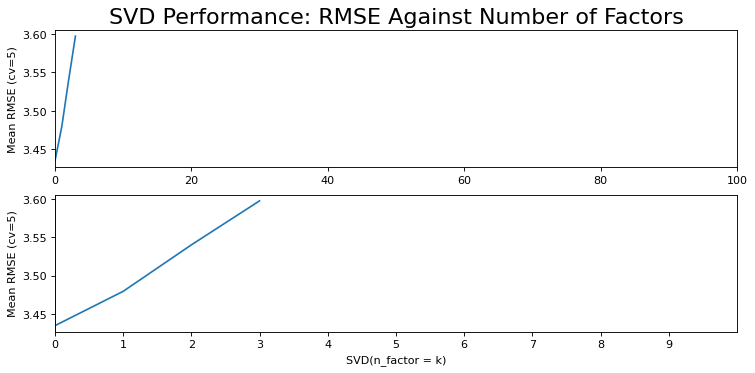

In [ ]:
plot_rmse(rmse_svd,"SVD")

In [ ]:
param_grid = {'n_factors': [0,1,4,6,9,11,14,18,29]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)


# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

3.417459688548689
{'n_factors': 29}


In [ ]:
algo_SVD = SVD(n_factors = 29)
algo_SVD.fit(trainset)

In [ ]:
def get_top_n(predictions, userId, movies_df, ratings_df, n = 10):
    '''Return the top N (default) movieId for a user,.i.e. userID and history for comparisom
    Args:
    Returns: 
  
    '''
    #Peart I.: Surprise docomuntation
    
    #1. First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    #2. Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[: n ]
    
    #Part II.: inspired by: https://beckernick.github.io/matrix-factorization-recommender/
    
    #3. Tells how many movies the user has already rated
    user_data = ratings_df[ratings_df.userId == (userId)]
    print('User {0} has already rated {1} movies.'.format(userId, user_data.shape[0]))

    
    #4. Data Frame with predictions. 
    preds_df = pd.DataFrame([(id, pair[0],pair[1]) for id, row in top_n.items() for pair in row],
                        columns=["userID" ,"challenge_ID","rat_pred"])
    
    
    #5. Return pred_usr, i.e. top N recommended movies with (merged) titles and genres. 
    pred_usr = preds_df[preds_df["userID"] == (userId)].merge(movies_df, how = 'left', left_on = 'challenge_ID', right_on = 'challenge_ID')
            
    #6. Return hist_usr, i.e. top N historically rated movies with (merged) titles and genres for holistic evaluation
    hist_usr = ratings_df[ratings_df.userId == (userId) ].sort_values("rating", ascending = False).merge\
    (movies_df, how = 'left', left_on = 'challenge_ID', right_on = 'challenge_ID')
    
    
    return hist_usr, pred_usr

In [ ]:
challenge_df = pd.DataFrame({"challengeID":challenge['challenge_ID'].unique()})

In [ ]:
ratings_df = df[["user_id",	"challenge_ID",	"challenge_sequence"]]

In [ ]:
user_df = pd.DataFrame({"user_id":df['user_id'].unique()})

In [ ]:
predictions = algo_SVD.predict(uid= 4577, iid= 'CI23482')

In [ ]:
predictions

Prediction(uid=4577, iid='CI23482', r_ui=None, est=7.218217732439151, details={'was_impossible': False})

In [ ]:
predictions = []
challenge_list = challenge_df['challengeID'].unique()
for challenges in challenge_list:
  predictions.append(algo_SVD.predict(uid= 4577, iid= challenges).est)

In [ ]:
submission

,user_sequence,challenge,userID
0,4577_11,CI23648,4577
1,4577_12,CI23648,4577
2,4577_13,CI23648,4577
3,4578_11,CI23648,4578
4,4578_12,CI23648,4578
...,...,...,...
119191,113834_12,CI23648,113834
119192,113834_13,CI23648,113834
119193,113838_11,CI23648,113838
119194,113838_12,CI23648,113838


In [ ]:
test_df.head()

,user_sequence,user_id,challenge_sequence,challenge
0,4577_1,4577,1,CI23855
1,4577_2,4577,2,CI23933
2,4577_3,4577,3,CI24917
3,4577_4,4577,4,CI24915
4,4577_5,4577,5,CI23714


In [ ]:
test_df[test_df['user_id'] == 4577]['challenge'].unique()

array(['CI23855', 'CI23933', 'CI24917', 'CI24915', 'CI23714', 'CI23663',
       'CI24958', 'CI25135', 'CI25727', 'CI24530'], dtype=object)

In [ ]:
list_2 = [5,2,3,4,1]
list_1 = [2,3,4,8,9,4,5]
main_list = [item for item in list_2 if item not in list_1]

In [ ]:
main_list.insert(0,2)

In [ ]:
final_df = pd.DataFrame([main_list],columns=["first",'second'])


In [ ]:
mydict = {'challenge11':0,'challenge12':0}
mydict['challenge11'] = main_list[0]
mydict['challenge12'] = main_list[1]

In [ ]:
df = pd.concat([pd.Series(v, name=k) for k, v in mydict.items()], axis=1)

In [ ]:
df

,challenge11,challenge12
0,2,1


In [ ]:
list_ = []
my = [1,2,3]

In [ ]:
list_.extend(my)

In [ ]:
list_

[1, 2, 3]

In [ ]:
algo_SVD.predict(uid= 4577, iid= "CI23855").est

1.0071355962114117

In [ ]:
challenge_list = challenge_df['challengeID'].unique()
userlist = submission['userID'].unique()
list_of_challenges = []
for e,users in enumerate(userlist):
  print(users)
  predictions = []
  challenges_taken = test_df[test_df['user_id'] == users]['challenge'].unique()
  for challenge in challenge_list:
    predictions.append(algo_SVD.predict(uid= users, iid= challenge).est)
  predictions = sorted(range(len(predictions)), key=lambda i:predictions[i])[:-14:-1]
  challenges_order = [challenge_list[i] for i in predictions]
  main_list = [item for item in challenges_order if item not in challenges_taken][:3]
  list_of_challenges.extend(main_list)






4577
4578
4579
4583
4584
4586
4588
4589


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Streaming output truncated to the last 5000 lines.
99982
99985
99987
99990
99992
99994
99997
99999
100001
100003
100005
100007
100008
100010
100012
100013
100020
100023
100024
100025
100031
100036
100037
100047
100048
100049
100051
100053
100055
100069
100071
100074
100075
100076
100078
100084
100088
100093
100096
100097
100098
100101
100102
100107
100110
100111
100112
100113
100120
100121
100122
100123
100124
100126
100128
100130
100131
100135
100136
100139
100140
100143
100144
100146
100147
100152
100154
100155
100156
100158
100170
100171
100180
100186
100188
100192
100196
100199
100204
100206
100208
100209
100214
100215
100216
100221
100223
100224
100227
100229
100231
100234
100240
100241
100242
100246
100250
100252
100255
100256
100257
100258
100260
100261
100265
100267
100272
100276
100278
100279
100282
100283
100284
100288
100290
100292
100294
100301
100303
100304
100311
100312
100313
100318
100319
100322
100324
100325
100327
100332
100336
100340
100341
100343
100346
100348
10035

In [ ]:
myfinal = pd.concat([submission,pd.Series(list_of_challenges)],axis=1)

In [ ]:
myfinal = myfinal[['user_sequence',0]]

In [ ]:
submission.head()

,user_sequence,challenge,userID
0,4577_11,CI23648,4577
1,4577_12,CI23648,4577
2,4577_13,CI23648,4577
3,4578_11,CI23648,4578
4,4578_12,CI23648,4578


In [ ]:
myfinal.columns = ['user_sequence','challenge']

In [ ]:
myfinal.to_csv("submission_surprise.csv",index=False)

In [ ]:
len(list_of_challenges)

119196

In [ ]:
challenge_list = challenge_list.tolist()

In [ ]:
[item for item in challenges_order if item not in challenges_taken][:3]

['CI24646', 'CI24599', 'CI24595']

In [ ]:
submission['userID'].nunique()

39732

In [ ]:
list_of_challenges

[]

In [ ]:
predictions.index(max(predictions))

1968

In [ ]:
predictions[1968]

11.454787635107634

In [ ]:
predictions[2673]

0.5

In [ ]:
challenge_list = challenge_df['challengeID'].unique()
s = sorted(range(len(predictions)), key=lambda i:predictions[i])[:-14:-1]

In [ ]:
property_asel = [challenge_list[i] for i in s]

In [ ]:
property_asel

['CI25446',
 'CI26844',
 'CI24597',
 'CI25083',
 'CI25078',
 'CI27978',
 'CI24595',
 'CI25436',
 'CI24600',
 'CI24787',
 'CI24272',
 'CI25442',
 'CI25191']

In [ ]:
sorted(range(len(predictions)), key=lambda i:predictions[i])[:-14:-1]

[1713, 1964, 794, 1309, 1122, 1958, 1117, 4444, 1600, 1605, 1119, 3348, 1968]

In [ ]:
challenge_df['challengeID'].unique()[1968]

'CI25446'

In [ ]:
predictions

Prediction(uid=4577, iid='CI23482', r_ui=None, est=7.667275948805113, details={'was_impossible': False})

In [ ]:
testset = trainset.build_anti_testset()

NameError: ignored

In [ ]:
hist_SVD_124, pred_SVD_124 = get_top_n(predictions, movies_df = challenge_df, userId = 4577, ratings_df = ratings_df)

NameError: ignored